<a href="https://colab.research.google.com/github/shduswjd/Machine-Learning/blob/main/ml_ex2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (a) least squares function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def leastSquares(data, label):
  n, d = data.shape

  x = np.c_[data, np.ones((n, 1))]
  y = label

  # use formula that minimize the sum of squares of error
  inv_x = np.linalg.pinv(x)
  weight = np.matmul(inv_x, y)

  bias = weight[-1]
  weight = weight[:-1][:,np.newaxis]

  return weight, bias



# (b) linclass - classify 1 or -1

In [ ]:
def linclass(weight, bias, data):
  n, d = data.shape

  class_pred = np.zeros((len(data)))
  pred_y = np.zeros((n,d))
  for i in range(d):
    pred_y [:, i] = weight[i] * data[:, i]
  pred_y = pred_y.sum(axis = 1) + bias

  for j in range(n):
    if pred_y[j] < 0:
      class_pred[j] = -1
    else:
      class_pred[j] = 1

  return class_pred

# apply function

In [ ]:
def plot_(data, labels, weight, bias, window_title):
    #PLOT_ Summary of this function goes here
    #   Detailed explanation goes here

    # Define the range
    xmax = 1.5 #max(data(:, 1))
    xmin = -0.5 #min(data(:, 1))
    ymax = 1.5 #max(data(:, 2))
    ymin = -0.5 #min(data(:, 2))

    # Plot the data points and the decision line
    plt.subplot()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title(window_title)
    plt.plot(data[labels==1][:,0], data[labels==1][:,1], c = 'b', marker = 'x', linestyle='none', markersize=5)
    plt.plot(data[labels==-1][:,0], data[labels==-1][:,1], c = 'r', marker = 'o', linestyle='none', markersize=5, fillstyle='none')
    plt.plot([xmin, xmax], [-(weight[0]*xmin+bias)/weight[1], -(weight[0]*xmax+bias)/weight[1]], c = 'k')
    plt.show()


Accuracy on train set: 0.9736842105263158


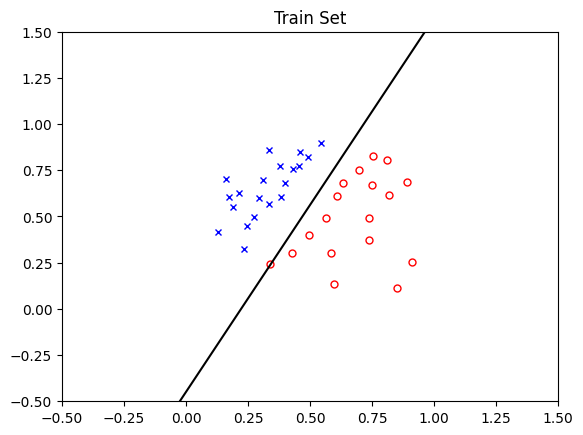

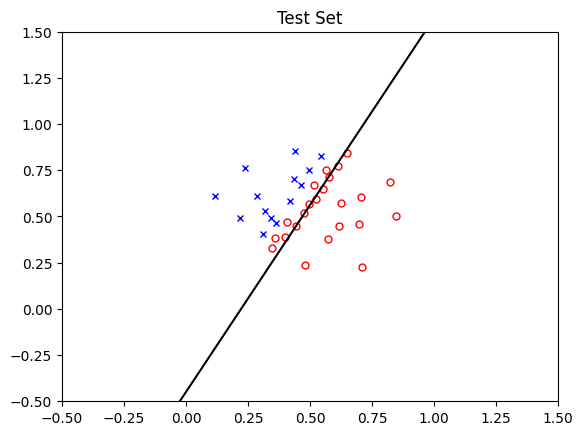

Accuracy on test set: 	 0.7837837837837838



In [ ]:
train = {}
test = {}
## Load the data
train.update({'data': np.loadtxt('lc_train_data.dat')})
train.update({'label': np.loadtxt('lc_train_label.dat')})
test.update({'data': np.loadtxt('lc_test_data.dat')})
test.update({'label': np.loadtxt('lc_test_label.dat')})

## Q1 a) Train the classifier using the training dataset
weight, bias = leastSquares(train['data'], train['label'])

## Q1 b) Evaluate the classifier on the training dataset
train.update({'prediction': linclass(weight, bias, train['data'])})

# Print and show the performance of the classifier
train.update({'acc' : sum(train['prediction'] == train['label'])/len(train['label'])})
print('Accuracy on train set: {0}'.format(train['acc']))
plot_(train['data'], train['label'], weight, bias, 'Train Set')


# Test the classifier on the test dataset
test.update({'prediction': linclass(weight, bias, test['data'])})

# Print and show the performance of the classifier
test.update({'acc' : sum(test['prediction'] == test['label'])/len(test['label'])})
plot_(test['data'], test['label'], weight, bias, 'Test Set')
print('Accuracy on test set: \t {0}\n'.format(test['acc']))

# (bounus) adding outliers

Adding outliers...
Accuracy on train set: 0.925


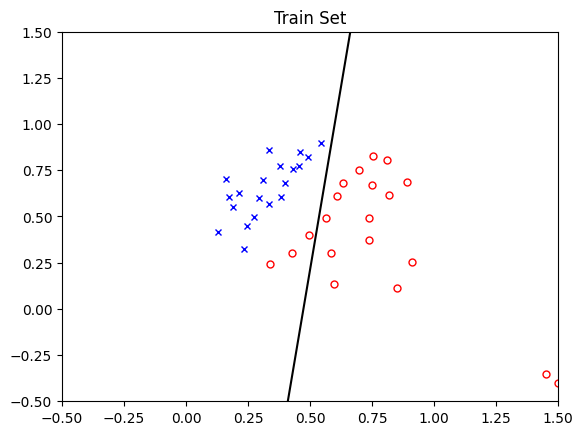

Accuracy on test set: 	 0.6756756756756757



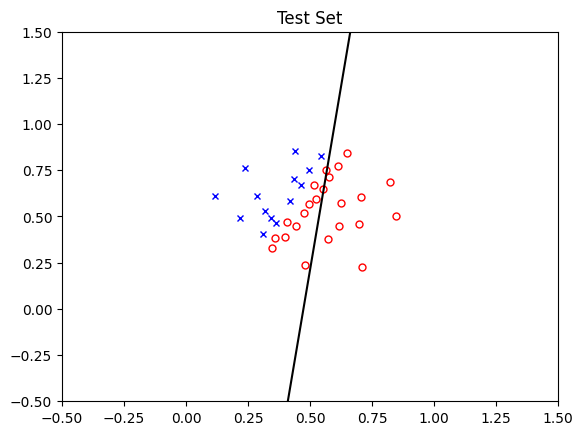

In [ ]:
## Bonus: Add outlier to training data, what happens?
print('Adding outliers...')

train['data'] = np.append(train['data'], [[1.5, -0.4],[1.45, -0.35]], axis = 0)
train['label'] = np.append(train['label'], [[-1],[-1]])

# Train the classifier using the training dataset
weight, bias = leastSquares(train['data'], train['label'])

# Evaluate the classifier on the training dataset
train['prediction'] = linclass(weight, bias, train['data'])

# Print and show the performance of the classifier
train['acc'] = sum(train['prediction'] == train['label'])/len(train['label'])
print('Accuracy on train set: {0}'.format(train['acc']))
plot_(train['data'], train['label'], weight, bias, 'Train Set')


# Test the classifier on the test dataset
test['prediction'] = linclass(weight, bias, test['data'])

# Print and show the performance of the classifier
test['acc'] = sum(test['prediction']==test['label'])/len(test['label'])
print('Accuracy on test set: \t {0}\n'.format(test['acc']))
plot_(test['data'], test['label'], weight, bias, 'Test Set')